In [9]:
#                                               --- --- --- --- --- --- --- Súmario --- --- --- --- --- --- ---
#Este código foi utilizado para estudo e foi retirado do Kaggle, do usuário Fares Sayah. Ele aborda a análise e previsão do mercado de ações utilizando LSTM 
#(Long Short-Term Memory), uma técnica de aprendizado de máquina para sequências temporais. https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#1.-What-was-the-change-in-price-of-the-stock-overtime?

#-- -- glosario -- --
#Open: É o preço de abertura de uma ação no início do período de negociação, geralmente referente ao primeiro preço pelo qual uma ação é negociada em um determinado dia de negociação.
#High: É o preço mais alto atingido pela ação durante o período de negociação específico, indicando o pico máximo de valor que a ação alcançou durante o dia.
#Low: É o preço mais baixo atingido pela ação durante o período de negociação, indicando o ponto mais baixo de valor que a ação alcançou durante o dia.
#Close: É o preço de fechamento da ação no final do período de negociação, geralmente referente ao último preço pelo qual uma ação é negociada em um determinado dia de negociação.
#Adj Close (Ajusted Close): É o preço de fechamento da ação após todos os ajustes de dividendos e divisões terem sido aplicados. Isso fornece uma medida mais precisa do valor da ação ao longo do tempo, levando em consideração os eventos corporativos que afetam o preço.
#Volume: É a quantidade total de ações negociadas durante o período de negociação especificado. Representa a atividade de negociação para a ação durante o dia.

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para visualização
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Para ler os dados do mercado de ações do Yahoo Finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# Sobrescrevendo o método download para o Yahoo Finance
yf.pdr_override()

# Para manipulação de data e hora
from datetime import datetime

# Lista das empresas de tecnologia que serão analisadas
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Definindo o período de coleta dos dados
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Coletando os dados para cada empresa na lista de tecnologia
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
# Lista das empresas e seus respectivos nomes
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Adicionando o nome da empresa como uma coluna em cada DataFrame
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
# Concatenando todos os DataFrames em um único DataFrame
df = pd.concat(company_list, axis=0)

# Exibindo as últimas 10 linhas do DataFrame combinado
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-12,132.169998,134.479996,131.229996,132.330002,132.330002,55528600,AMAZON
2023-10-13,132.979996,133.309998,128.949997,129.789993,129.789993,45786600,AMAZON
2023-10-16,130.690002,133.070007,130.429993,132.550003,132.550003,42832900,AMAZON
2023-10-17,130.389999,132.580002,128.710007,131.470001,131.470001,49344600,AMAZON
2023-10-18,129.899994,130.669998,127.510002,128.130005,128.130005,42699500,AMAZON
...,...,...,...,...,...,...,...
2024-02-29,173.009995,177.220001,172.850006,176.759995,176.759995,53805400,AMAZON
2024-03-01,176.750000,178.729996,176.070007,178.220001,178.220001,31956200,AMAZON
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON


In [4]:
# Descrição estatística do DataFrame da empresa Apple (AAPL)
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,179.542580,181.009961,178.206309,179.717897,179.203080,5.736037e+07
std,11.283159,11.111581,11.235244,11.143514,11.275910,1.683499e+07
min,147.809998,150.940002,147.610001,148.500000,147.711548,2.404830e+07
25%,172.584995,174.024998,171.465000,172.997501,172.522278,4.678918e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048973,5.340815e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.392830e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [5]:
# Exibindo informações sobre o DataFrame da empresa Apple (AAPL)
AAPL.info()# Configurando o tamanho da figura
plt.figure(figsize=(15, 10))

# Ajustando o espaço entre os subplots
plt.subplots_adjust(top=1.25, bottom=1.2)

# Iterando sobre as empresas na lista e plotando o preço ajustado de fechamento para cada uma
for i, company in enumerate(company_list, 1):
    # Criando subplots
    plt.subplot(2, 2, i)
    
    # Plotando o preço ajustado de fechamento
    company['Adj Close'].plot()
    
    # Configurando rótulos e título
    plt.ylabel('Adj Close')
    plt.xlabel(None)  # Não mostrando rótulo no eixo x
    plt.title(f"Closing price of {tech_list[i - 1]}")
    
# Ajustando o layout dos subplots
plt.tight_layout()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-07 to 2024-03-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


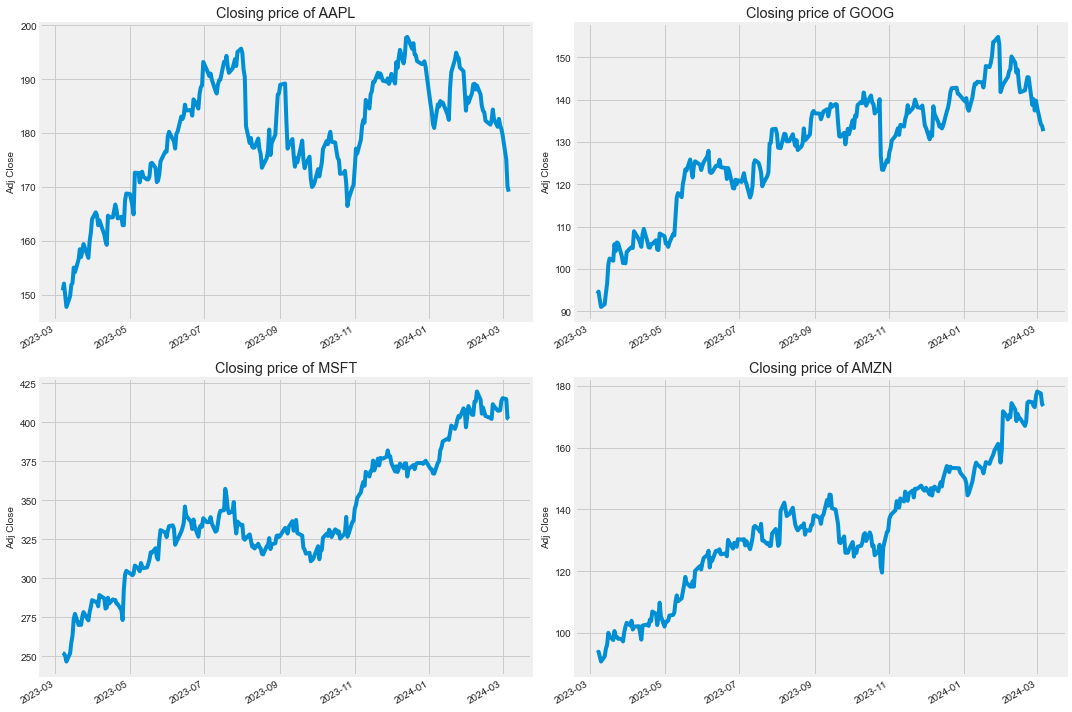

In [61]:
# Configurando o tamanho da figura
plt.figure(figsize=(15, 10))

# Ajustando o espaço entre os subplots
plt.subplots_adjust(top=1.25, bottom=1.2)

# Iterando sobre as empresas na lista e plotando o preço ajustado de fechamento para cada uma
for i, company in enumerate(company_list, 1):
    # Criando subplots
    plt.subplot(2, 2, i)
    
    # Plotando o preço ajustado de fechamento
    company['Adj Close'].plot()
    
    # Configurando rótulos e título
    plt.ylabel('Adj Close')
    plt.xlabel(None)  # Não mostrando rótulo no eixo x
    plt.title(f"Closing price of {tech_list[i - 1]}")
    
# Ajustando o layout dos subplots
plt.tight_layout()


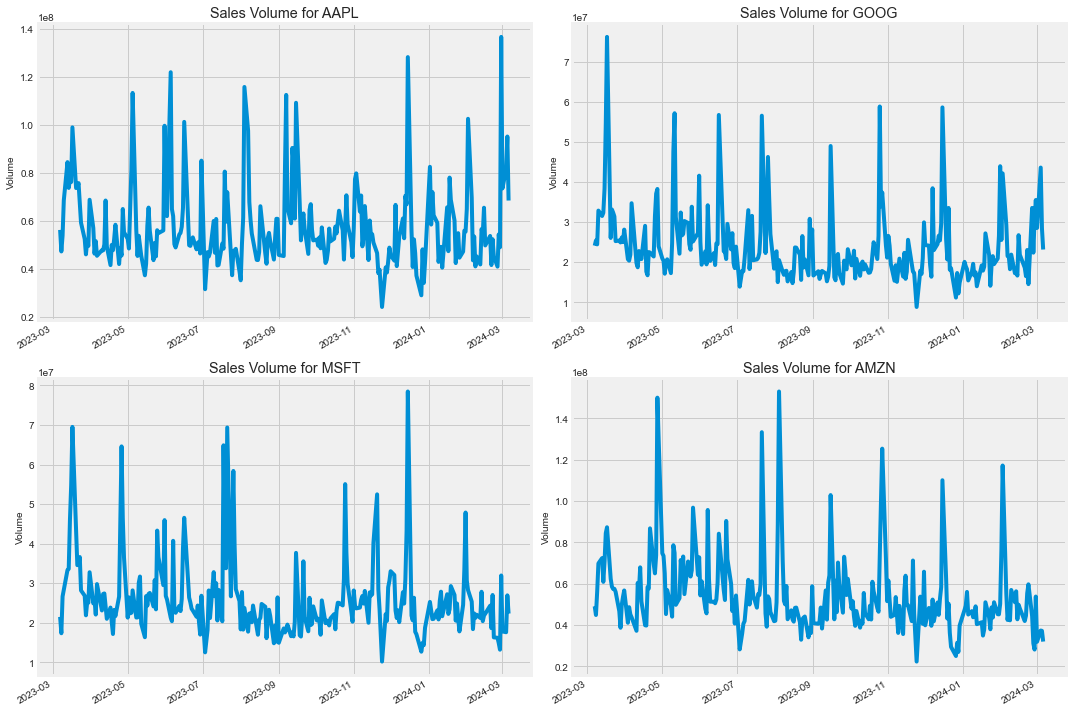

In [23]:
# Configurando o tamanho da figura
plt.figure(figsize=(15, 10))

# Ajustando o espaço entre os subplots
plt.subplots_adjust(top=1.25, bottom=1.2)

# Iterando sobre as empresas na lista e plotando o volume de vendas para cada uma
for i, company in enumerate(company_list, 1):
    # Criando subplots
    plt.subplot(2, 2, i)
    
    # Plotando o volume de vendas
    company['Volume'].plot()
    
    # Configurando rótulos e título
    plt.ylabel('Volume')
    plt.xlabel(None)  # Não mostrando rótulo no eixo x
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
# Ajustando o layout dos subplots
plt.tight_layout()

Text(0.5, 1.0, 'AMAZON')

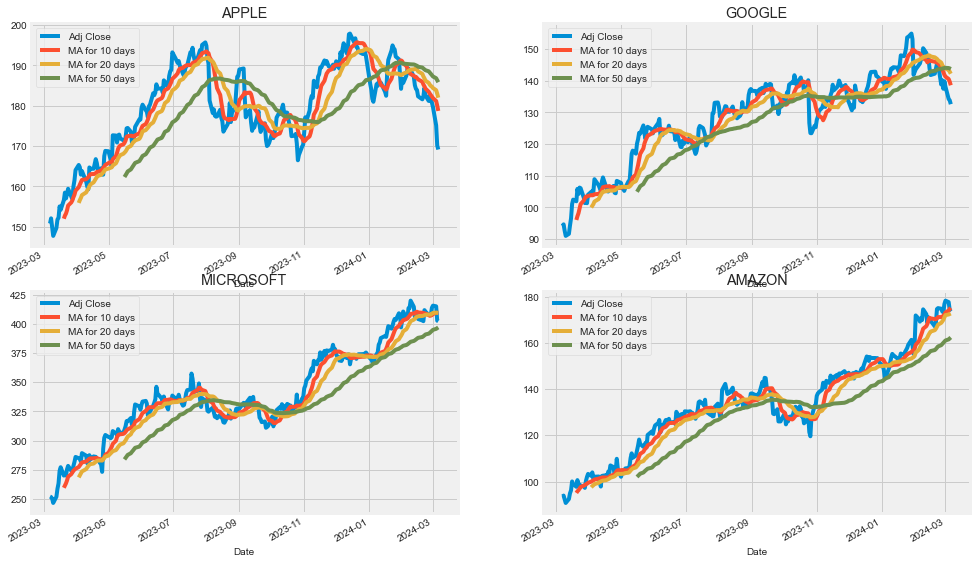

In [26]:
# Definindo as janelas de médias móveis
ma_day = [10, 20, 50]

# Calculando as médias móveis para cada empresa e cada janela
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Criando uma figura e eixos para os subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15) 

# Plotando os preços ajustados de fechamento e as médias móveis para cada empresa
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


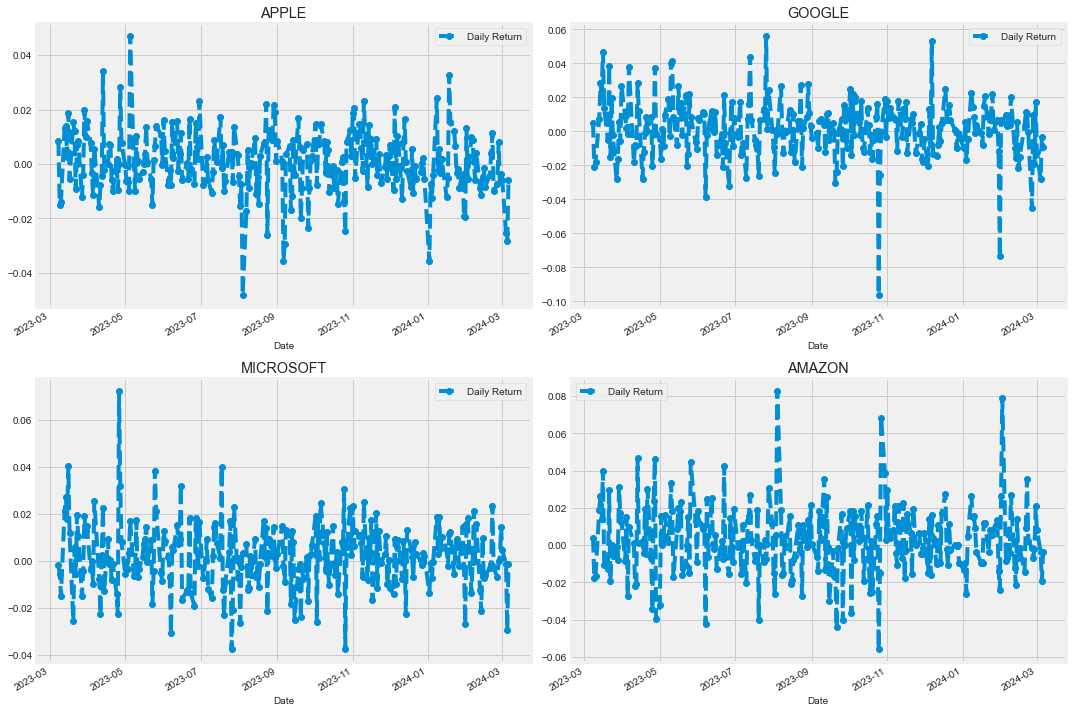

In [27]:
# Calculando o retorno diário percentual para cada empresa
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Criando uma figura e eixos para os subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plotando o retorno diário percentual para cada empresa
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

# Ajustando o layout dos subplots
fig.tight_layout()

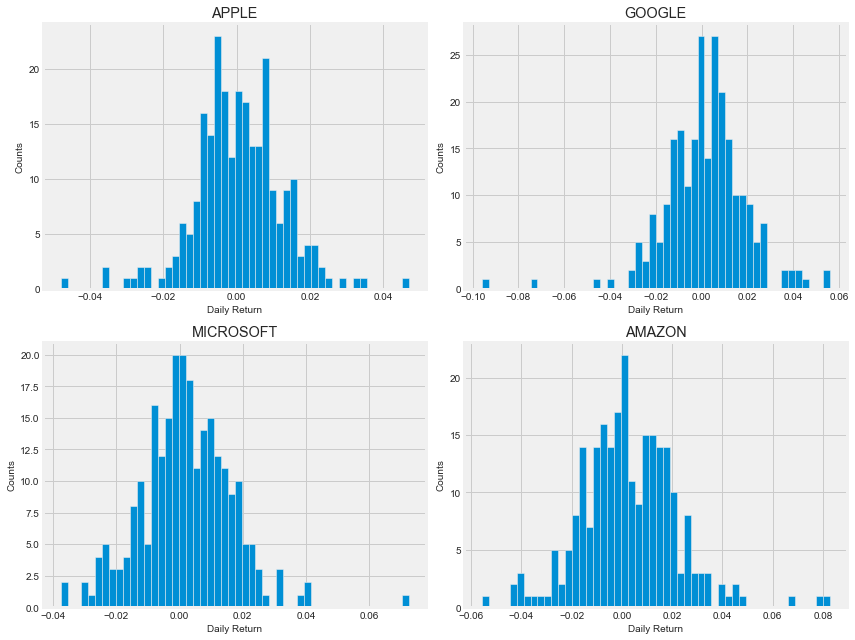

In [28]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 9))

# Iterando sobre as empresas na lista e plotando o histograma do retorno diário percentual para cada uma
for i, company in enumerate(company_list, 1):
    # Criando subplots
    plt.subplot(2, 2, i)
    
    # Plotando o histograma do retorno diário percentual
    company['Daily Return'].hist(bins=50)
    
    # Configurando rótulos e título
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
# Ajustando o layout dos subplots
plt.tight_layout()


In [31]:
# Obtendo os dados de fechamento ajustado do Yahoo Finance para as empresas da lista tech_list
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Calculando o retorno percentual diário para cada empresa
tech_rets = closing_df.pct_change()

# Exibindo as primeiras linhas do DataFrame dos retornos percentuais diários
tech_rets.head()


[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-07,NaN,NaN,NaN,NaN
2023-03-08,0.008377,0.003955,0.005097,-0.001771
2023-03-09,-0.014915,-0.017781,-0.021025,-0.005439
2023-03-10,-0.013879,-0.016477,-0.017807,-0.014783
2023-03-13,0.013266,0.018737,0.007142,0.021441


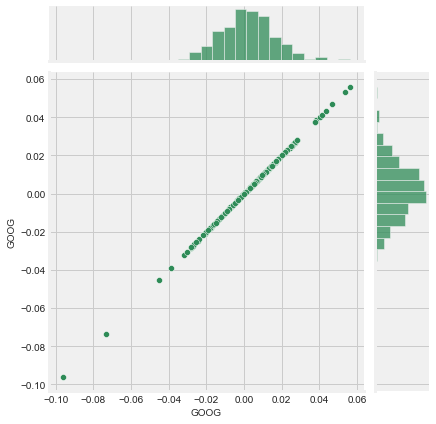

In [32]:
# Criando um jointplot entre o retorno percentual diário de 'GOOG' em relação a si mesmo
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

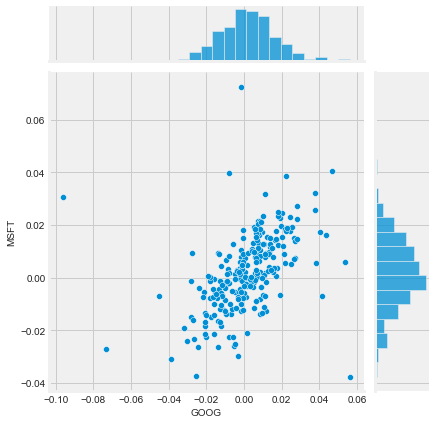

In [33]:
# Criando um jointplot entre o retorno percentual diário de 'GOOG' e 'MSFT'
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

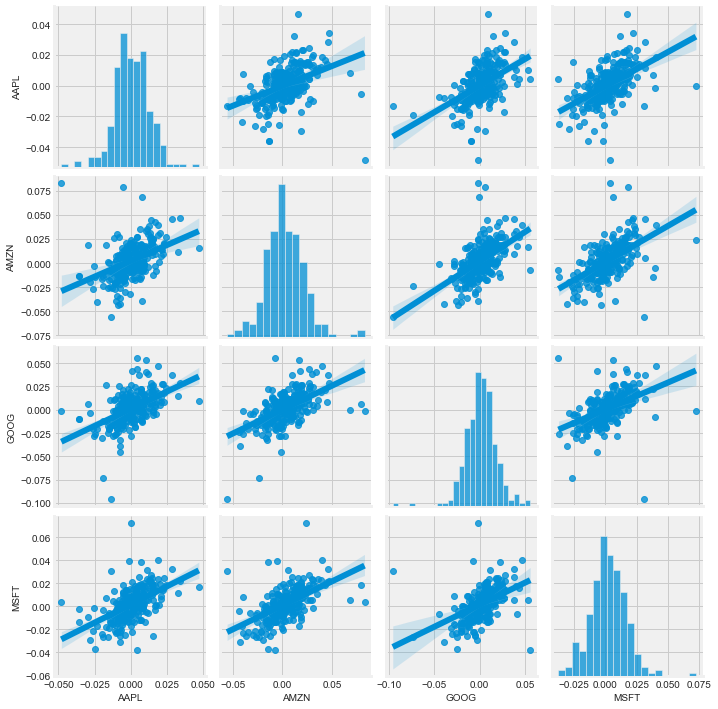

In [38]:
# Criando um pairplot dos retornos percentuais diários de todas as empresas
sns.pairplot(tech_rets, kind='reg')

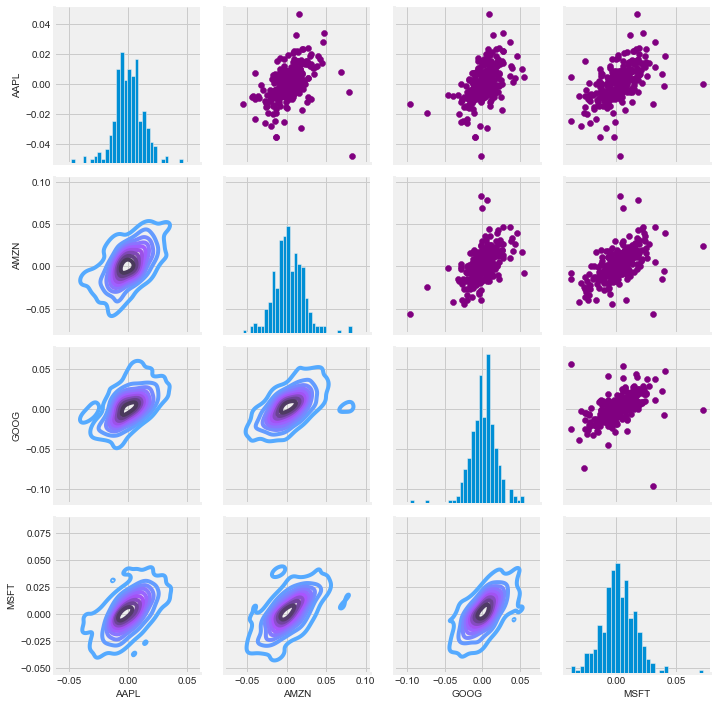

In [41]:
# Configurando nosso PairGrid e removendo valores NaN
return_fig = sns.PairGrid(tech_rets.dropna())

# Definindo o tipo de plotagem para a parte superior do gráfico
return_fig.map_upper(plt.scatter, color='purple')

# Definindo o tipo de plotagem para a parte inferior do gráfico, usando um gráfico de densidade de kernel (kde)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Definindo o tipo de plotagem para a diagonal, usando histogramas dos retornos diários
return_fig.map_diag(plt.hist, bins=30)

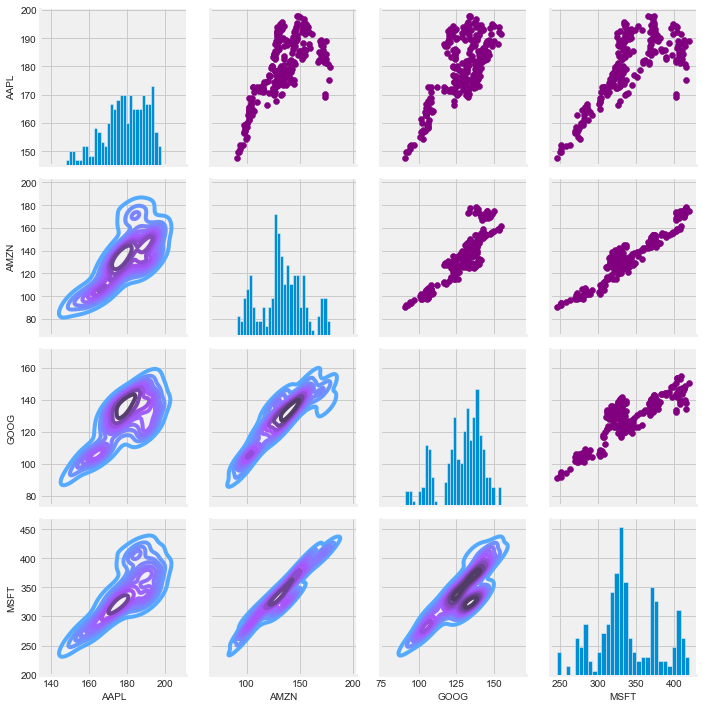

In [62]:
# Configurando nosso PairGrid
returns_fig = sns.PairGrid(closing_df)

# Definindo o tipo de plotagem para a parte superior do gráfico (scatter plot)
returns_fig.map_upper(plt.scatter, color='purple')

# Definindo o tipo de plotagem para a parte inferior do gráfico (kde plot) e o mapa de cores
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Definindo o tipo de plotagem para a diagonal (histograma)
returns_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

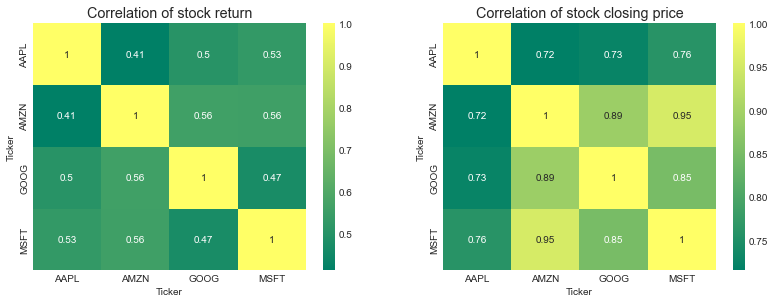

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando uma figura com tamanho específico
plt.figure(figsize=(12, 10))

# Subplot 1: heatmap da correlação dos retornos de ações
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

# Subplot 2: heatmap da correlação dos preços de fechamento das ações
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Mostrando o gráfico
plt.show()

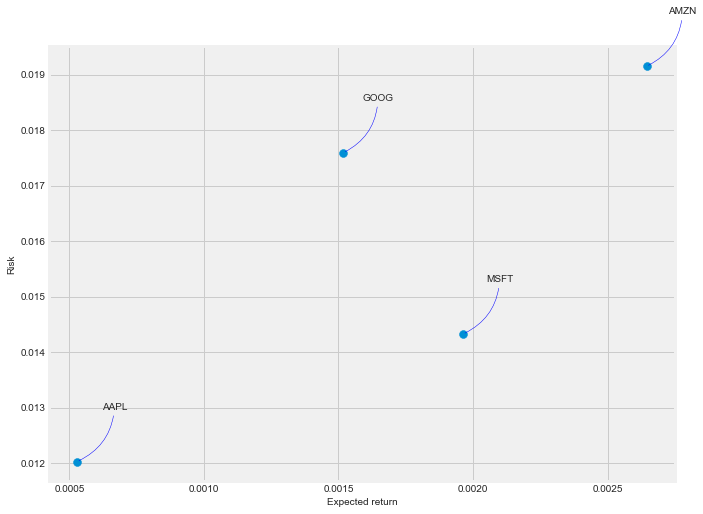

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Removendo valores NaN do DataFrame de retornos
rets = tech_rets.dropna()

# Calculando a área dos pontos no gráfico de dispersão
area = np.pi * 20

# Criando uma figura com tamanho específico
plt.figure(figsize=(10, 8))

# Plotando o gráfico de dispersão com o retorno esperado no eixo x e o risco (desvio padrão) no eixo y
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Adicionando rótulos para cada ponto no gráfico
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Mostrando o gráfico
plt.show()

In [47]:
import pandas_datareader as pdr
from datetime import datetime

# Obtendo os dados históricos das ações da Apple (AAPL)
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

# Exibindo o DataFrame
print(df)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400
...,...,...,...,...,...,...
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400


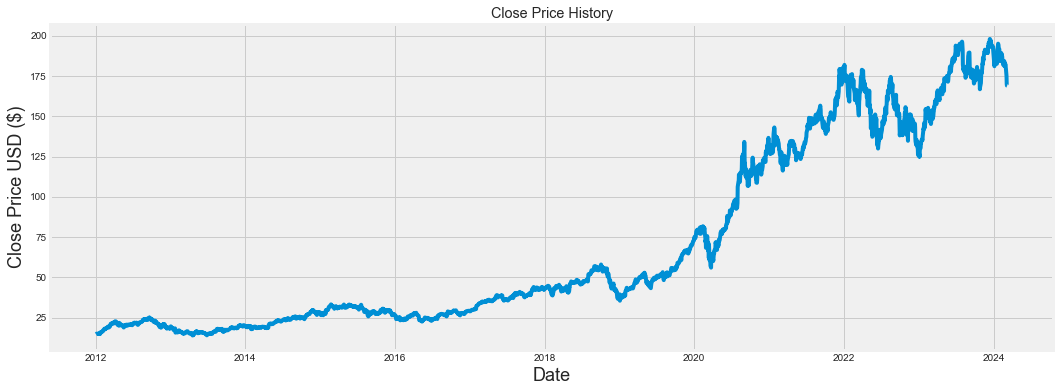

In [48]:
import matplotlib.pyplot as plt

# Configurando o tamanho da figura
plt.figure(figsize=(16,6))

# Definindo o título do gráfico
plt.title('Close Price History')

# Plotando o histórico de preços de fechamento
plt.plot(df['Close'])

# Definindo os rótulos dos eixos x e y
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Mostrando o gráfico
plt.show()

In [65]:
# Criar um novo dataframe contendo apenas a coluna 'Close'
data = df.filter(['Close'])

# Converter o dataframe para um array numpy
dataset = data.values

# Calcular o número de linhas para treinar o modelo
# Utilizando 95% dos dados como conjunto de treinamento
training_data_len = int(np.ceil(len(dataset) * .95))

# Retorna o comprimento dos dados de treinamento
training_data_len

2911

In [55]:
# Importar a classe MinMaxScaler do módulo sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Criar uma instância do MinMaxScaler com o intervalo de escala especificado entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Aplicar a transformação de escala aos dados do conjunto de dados
scaled_data = scaler.fit_transform(dataset)

# Retorna os dados escalados
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84801463],
       [0.84258464],
       [0.84231321]])

In [56]:
# Criar o conjunto de dados de treinamento
# Criar o conjunto de dados de treinamento escalado
train_data = scaled_data[0:int(training_data_len), :]

# Dividir os dados em conjuntos de dados x_train e y_train
x_train = []  # Lista para armazenar as sequências de entrada
y_train = []  # Lista para armazenar os rótulos correspondentes

for i in range(60, len(train_data)):
    # Adicionar as últimas 60 entradas como entrada (x_train)
    x_train.append(train_data[i-60:i, 0])
    # Adicionar a próxima entrada como rótulo (y_train)
    y_train.append(train_data[i, 0])
    # Imprimir as entradas e rótulos das duas primeiras iterações para verificação
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Converter x_train e y_train para arrays numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Reformular os dados para que sejam aceitos pelo modelo LSTM (batch_size, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [57]:
# Importar as classes Sequential, Dense e LSTM do módulo keras.models
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Construir o modelo LSTM
model = Sequential()  # Inicializa um modelo sequencial
# Adicionar uma camada LSTM com 128 unidades, mantendo as sequências para camadas subsequentes
# A forma de entrada é especificada como (número de timesteps, número de features)
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# Adicionar uma segunda camada LSTM com 64 unidades, não mantendo as sequências
model.add(LSTM(64, return_sequences=False))
# Adicionar uma camada densa com 25 unidades
model.add(Dense(25))
# Adicionar uma camada de saída densa com uma única unidade para a previsão
model.add(Dense(1))

# Compilar o modelo
# Usando o otimizador Adam e a função de perda de erro médio quadrático (mean squared error)
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
# Os dados de entrada x_train e os rótulos y_train são usados para o treinamento
# O tamanho do lote é definido como 1 e o número de épocas como 1
model.fit(x_train, y_train, batch_size=1, epochs=1)

2024-03-07 11:46:05.811048: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 11:46:05.852737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 11:46:05.852772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 11:46:05.854297: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 11:46:05.860870: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 11:46:05.861392: I tensorflow/core/platform/cpu_feature_guard.cc:1

2851/2851 [==============================] - 61s 21ms/step - loss: 0.0011


In [58]:
# Definir o conjunto de dados de teste
test_data = scaled_data[training_data_len - 60:, :]

# Criar os conjuntos de dados x_test e y_test
x_test = []
y_test = dataset[training_data_len:, :]  # Os rótulos são os valores reais dos dados de teste

for i in range(60, len(test_data)):
    # Adicionar as últimas 60 entradas como entrada (x_test)
    x_test.append(test_data[i-60:i, 0])

# Converter x_test para um array numpy
x_test = np.array(x_test)

# Reformular os dados para que sejam aceitos pelo modelo LSTM (batch_size, timesteps, features)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obter os valores de preço previstos pelo modelo
predictions = model.predict(x_test)
# Reverter a escala das previsões para valores originais
predictions = scaler.inverse_transform(predictions)

# Calcular o erro quadrático médio (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 18ms/step


4.539915747874641

/tmp/ipykernel_565117/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


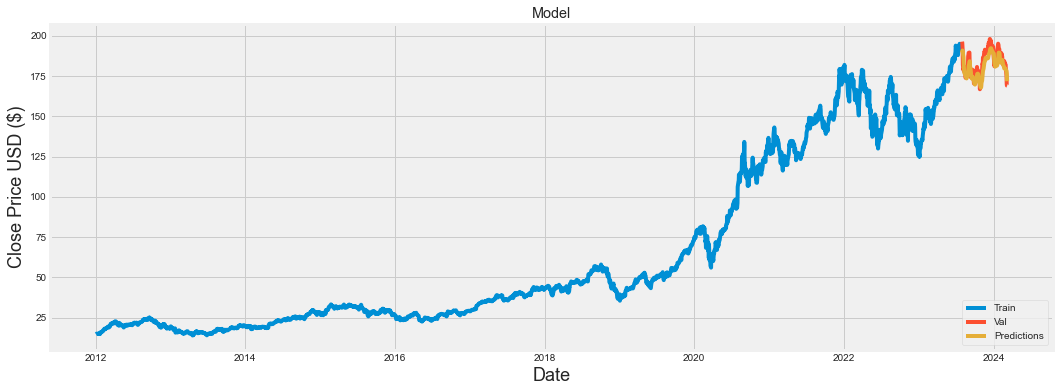

In [59]:
# Plotar os dados
train = data[:training_data_len]  # Dados de treinamento
valid = data[training_data_len:]  # Dados de validação
valid['Predictions'] = predictions  # Adicionar as previsões ao conjunto de dados de validação

# Visualizar os dados
plt.figure(figsize=(16,6))  # Configurar o tamanho da figura
plt.title('Model')  # Título do gráfico
plt.xlabel('Date', fontsize=18)  # Rótulo do eixo x
plt.ylabel('Close Price USD ($)', fontsize=18)  # Rótulo do eixo y
plt.plot(train['Close'])  # Plotar os dados de treinamento
plt.plot(valid[['Close', 'Predictions']])  # Plotar os dados de validação e as previsões
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')  # Adicionar legenda
plt.show()  # Mostrar o gráfico

In [60]:
valid

,Close,Predictions
Date,,
2023-07-31,196.449997,189.865387
2023-08-01,195.610001,190.552216
2023-08-02,192.580002,190.950134
2023-08-03,191.169998,190.497818
2023-08-04,181.990005,189.569199
...,...,...
2024-03-01,179.660004,178.934738
2024-03-04,175.100006,178.356888
2024-03-05,170.119995,176.860046


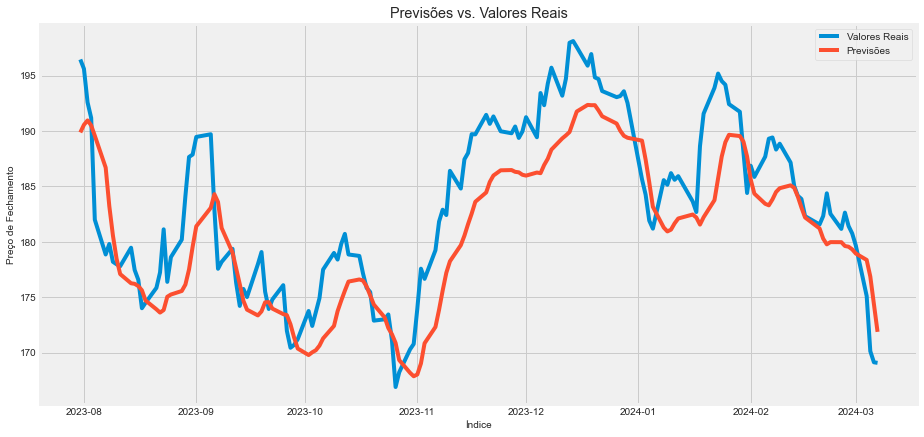

In [75]:
import matplotlib.pyplot as plt

# Plotar valores reais versus previsões
plt.figure(figsize=(14, 7))
plt.plot(valid['Close'], label='Valores Reais')
plt.plot(valid['Predictions'], label='Previsões')
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

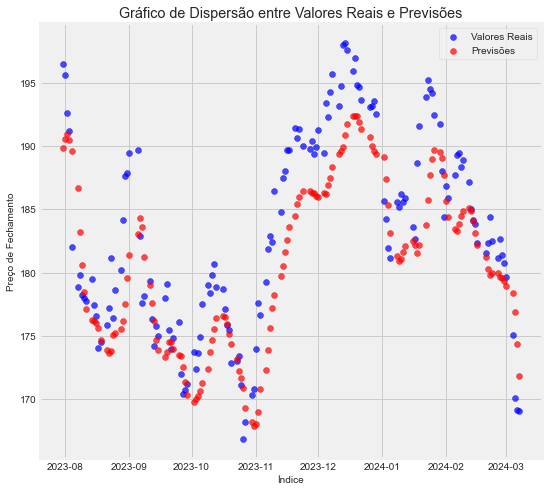

In [76]:
# Plotar um gráfico de dispersão entre os valores reais e as previsões
plt.figure(figsize=(8, 8))
plt.scatter(valid.index, valid['Close'], color='blue', label='Valores Reais', alpha=0.7) # Valores reais em azul
plt.scatter(valid.index, valid['Predictions'], color='red', label='Previsões', alpha=0.7) # Previsões em vermelho
plt.title('Gráfico de Dispersão entre Valores Reais e Previsões')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

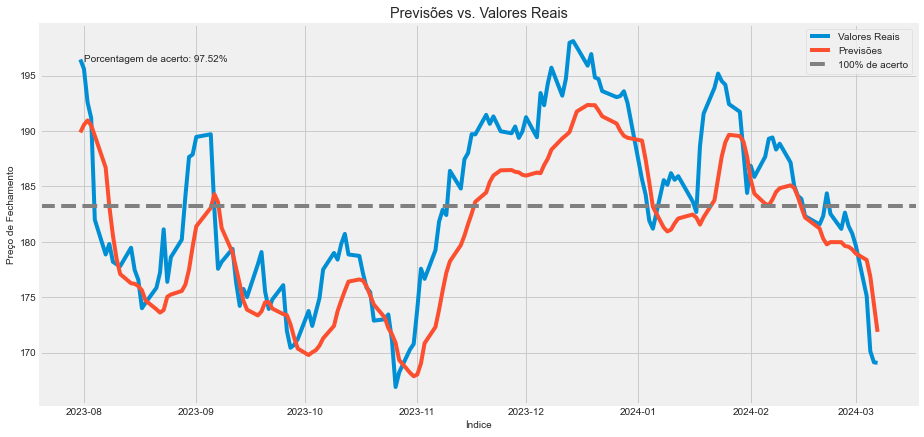

In [68]:
# Calcular a porcentagem de acerto
accuracy_percentage = (1 - (rmse / valid['Close'].mean())) * 100

# Plotar valores reais versus previsões com a linha de 100% de acerto
plt.figure(figsize=(14, 7))
plt.plot(valid['Close'], label='Valores Reais')
plt.plot(valid['Predictions'], label='Previsões')
plt.axhline(valid['Close'].mean(), color='gray', linestyle='--', label='100% de acerto')
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.text(0.05, 0.9, f'Porcentagem de acerto: {accuracy_percentage:.2f}%', transform=plt.gca().transAxes)
plt.show()

